<a href="https://colab.research.google.com/github/tajrink/summer_microcredential/blob/main/Diabetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [ ]:
#load data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/tajrink/data_ml/main/diabetic_data.csv')

In [ ]:
####

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.tail()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
df.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

In [8]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
df.shape

(101766, 50)

In [10]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [11]:
df['readmitted'] = df['readmitted'].replace(['NO'], 0 )
df['readmitted'] = df['readmitted'].replace(['<30'], 1 )
df['readmitted'] = df['readmitted'].replace(['>30'], 2 )


In [12]:
df.readmitted.value_counts()

0    54864
2    35545
1    11357
Name: readmitted, dtype: int64

In [14]:
df=df.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
         'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
         'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
         'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
         'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
         'metformin-rosiglitazone', 'metformin-pioglitazone','weight','payer_code','medical_specialty','diag_1','diag_2', 'diag_3','change',
         'patient_nbr','number_outpatient', 'number_inpatient', 'number_emergency'], axis=1)

In [15]:
df = df[df['gender'] != 'Unknown/Invalid']

In [16]:
df['gender']=df['gender'].replace(['Male'],0)
df['gender']=df['gender'].replace(['Female'],1)

In [17]:
df.gender.value_counts()

1    54708
0    47055
Name: gender, dtype: int64

In [18]:
df['age'] = df['age'].replace(['[0-10)'], 0 )
df['age'] = df['age'].replace(['[10-20)'], 1 )
df['age'] = df['age'].replace(['[20-30)'], 2 )
df['age'] = df['age'].replace(['[30-40)'], 3)
df['age'] = df['age'].replace(['[40-50)'], 4)
df['age'] = df['age'].replace(['[50-60)'], 5)
df['age'] = df['age'].replace(['[60-70)'], 6)
df['age'] = df['age'].replace(['[70-80)'], 7)
df['age'] = df['age'].replace(['[80-90)'], 8)
df['age'] = df['age'].replace(['[90-100)'], 9)


In [19]:
df.age.value_counts()

7    26066
6    22482
5    17256
8    17197
4     9685
3     3775
9     2793
2     1657
1      691
0      161
Name: age, dtype: int64

In [20]:
df = df[df['race'] != '?']

In [21]:
df.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

In [22]:
just_dummies = pd.get_dummies(df['race'])

df = pd.concat([df, just_dummies], axis=1)      


In [23]:
print(just_dummies)

        AfricanAmerican  Asian  Caucasian  Hispanic  Other
0                     0      0          1         0      0
1                     0      0          1         0      0
2                     1      0          0         0      0
3                     0      0          1         0      0
4                     0      0          1         0      0
...                 ...    ...        ...       ...    ...
101761                1      0          0         0      0
101762                1      0          0         0      0
101763                0      0          1         0      0
101764                0      0          1         0      0
101765                0      0          1         0      0

[99492 rows x 5 columns]


In [24]:
df.drop(['race'], inplace=True, axis=1)

In [30]:
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

In [31]:
df.diabetesMed.value_counts()

1    76491
0    23001
Name: diabetesMed, dtype: int64

In [28]:
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

In [29]:
df.max_glu_serum.value_counts()

-99    94202
 1      2719
 0      2571
Name: max_glu_serum, dtype: int64

In [26]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)

In [27]:
df.A1Cresult.value_counts()

-99    82896
 1     11691
 0      4905
Name: A1Cresult, dtype: int64

In [41]:
df['insulin'] = df['insulin'].replace('No', 0)
df['insulin'] = df['insulin'].replace('Steady', 1)
df['insulin'] = df['insulin'].replace('Up', 1)
df['insulin'] = df['insulin'].replace('Down', 1)


In [296]:
df.insulin.value_counts()

No        46495
Steady    29902
Down      12039
Up        11056
Name: insulin, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id              99492 non-null  int64
 1   gender                    99492 non-null  int64
 2   age                       99492 non-null  int64
 3   admission_type_id         99492 non-null  int64
 4   discharge_disposition_id  99492 non-null  int64
 5   admission_source_id       99492 non-null  int64
 6   time_in_hospital          99492 non-null  int64
 7   num_lab_procedures        99492 non-null  int64
 8   num_procedures            99492 non-null  int64
 9   num_medications           99492 non-null  int64
 10  number_diagnoses          99492 non-null  int64
 11  max_glu_serum             99492 non-null  int64
 12  A1Cresult                 99492 non-null  int64
 13  insulin                   99492 non-null  int64
 14  diabetesMed               99492 non-n

In [ ]:
##### visualization atleast 3

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

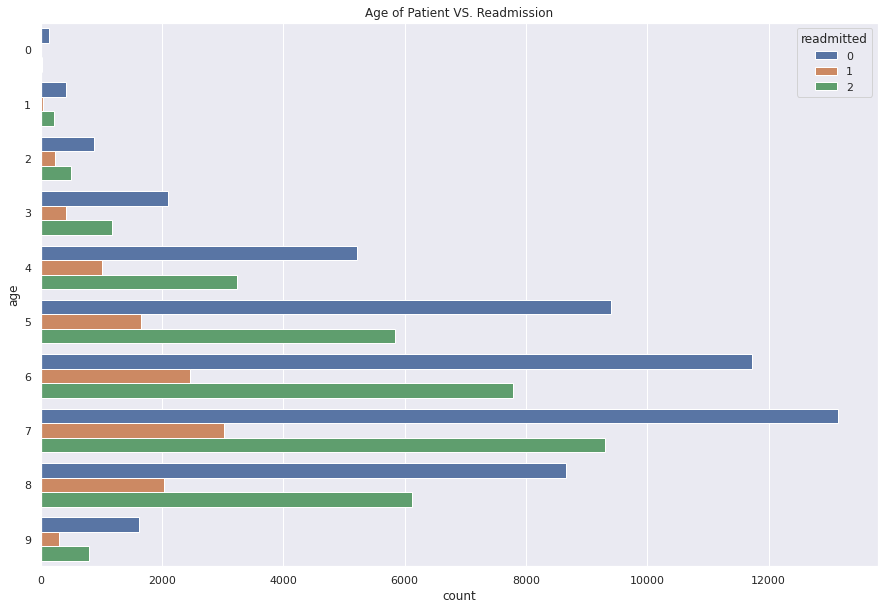

In [33]:
#Age and Readmission
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

In [39]:
#Ethnicity of patient and Readmission
#fig = plt.figure(figsize=(8,8))
#sns.countplot(y = df['race'], hue = df['readmitted'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

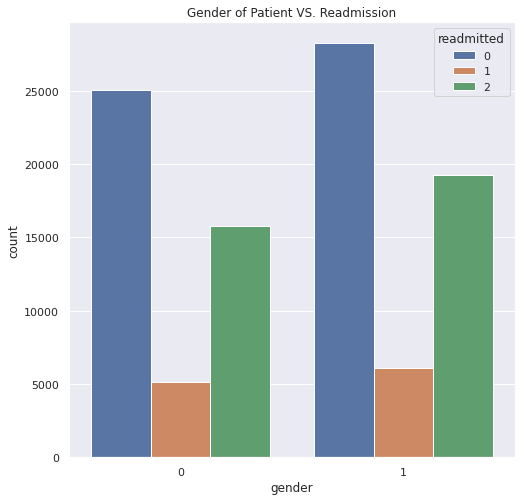

In [35]:
#Gender and Readmission
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

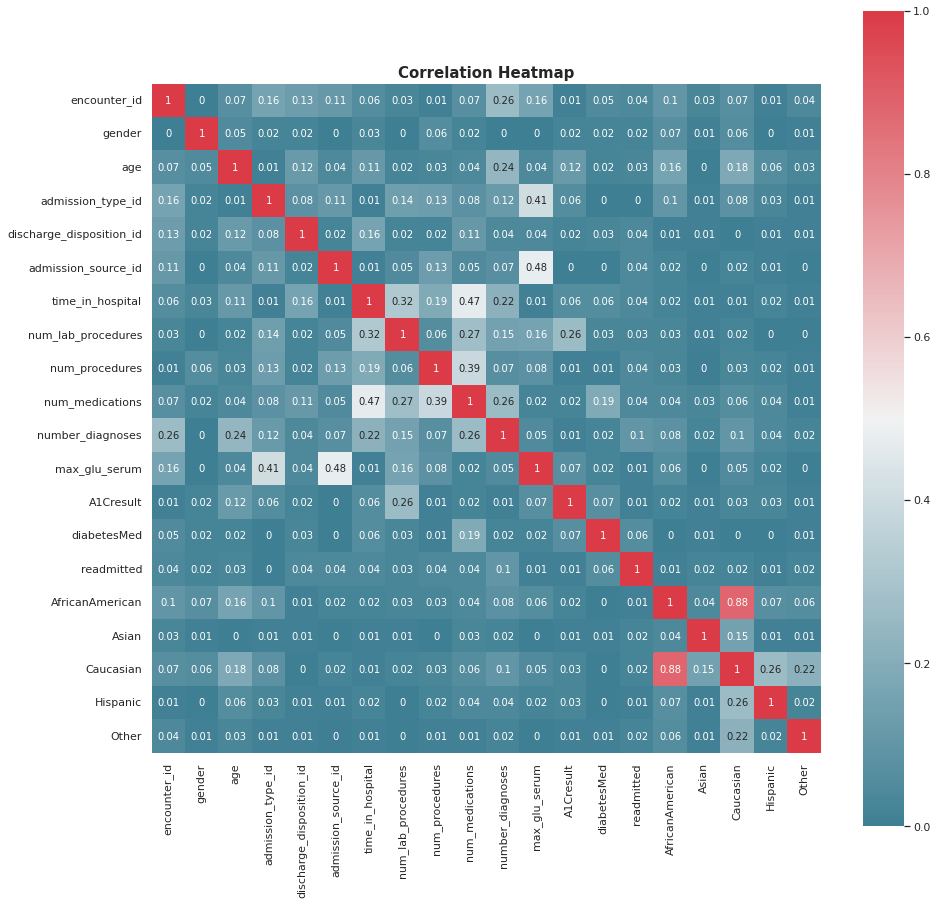

In [37]:
correlation = abs(round(df.corr(), 2))
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation, annot = True, square=True, cmap =sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)
plt.show();

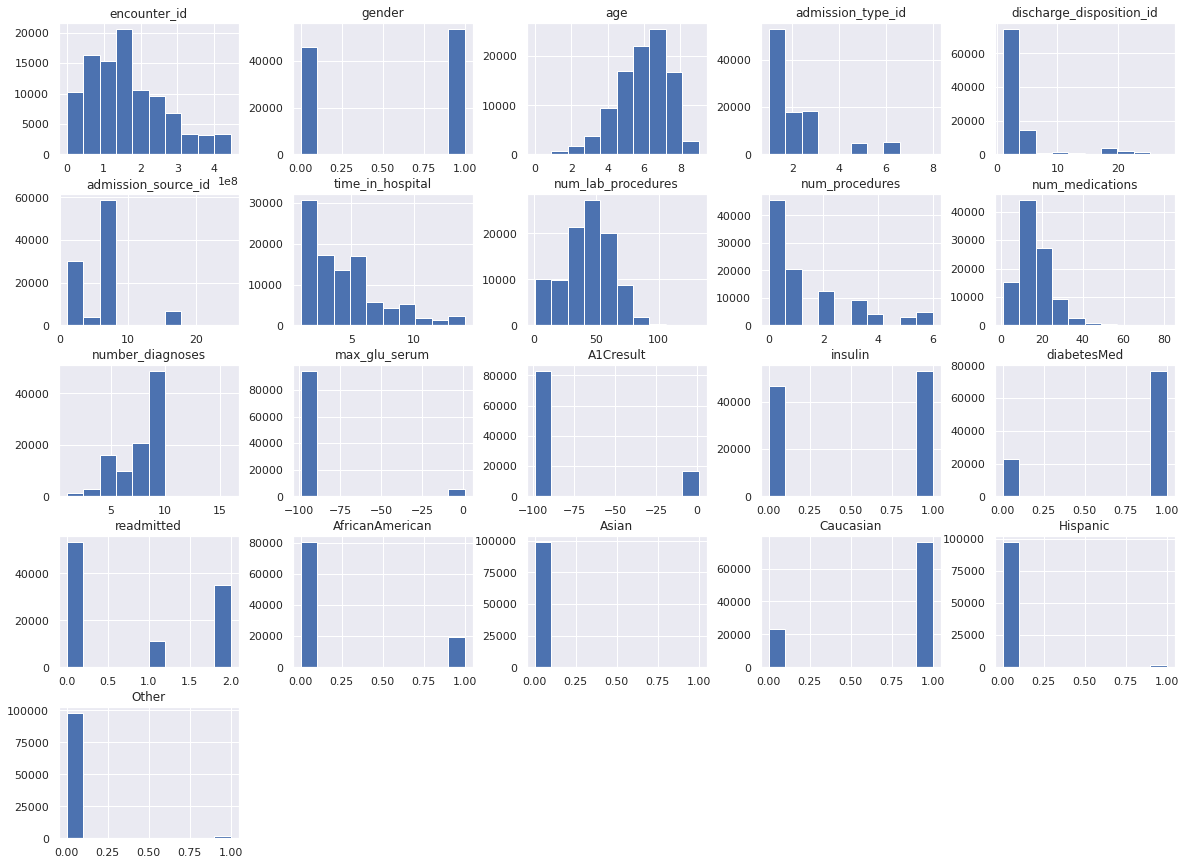

In [72]:
df.hist(figsize=(20,15));

In [ ]:
#### train_test split 

In [61]:
from sklearn.model_selection import train_test_split

X=df.drop('readmitted', axis=1)

y=df['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [62]:
### prediction
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#### random forest model

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
### prediction

In [64]:
rfc_pred=rfc.predict(X_test)

In [65]:
print(confusion_matrix(y_test,rfc_pred))

[[12769    70  3123]
 [ 2160    48  1095]
 [ 6796    58  3729]]


In [66]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.59      0.80      0.68     15962
           1       0.27      0.01      0.03      3303
           2       0.47      0.35      0.40     10583

    accuracy                           0.55     29848
   macro avg       0.44      0.39      0.37     29848
weighted avg       0.51      0.55      0.51     29848



In [ ]:
###knn model

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
### prediction

In [68]:
pred=knn.predict(X_test)

In [51]:
print(confusion_matrix(y_test,pred))

[[8800 1779 5503]
 [1751  384 1136]
 [5538 1237 3720]]


In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55     15962
           1       0.11      0.11      0.11      3303
           2       0.37      0.36      0.36     10583

    accuracy                           0.44     29848
   macro avg       0.34      0.34      0.34     29848
weighted avg       0.43      0.44      0.43     29848



In [ ]:
####

In [71]:
error_rate=[]

for i in range(1,40):

  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append (np.mean(pred_i != y_test))

KeyboardInterrupt: ignored

ValueError: ignored

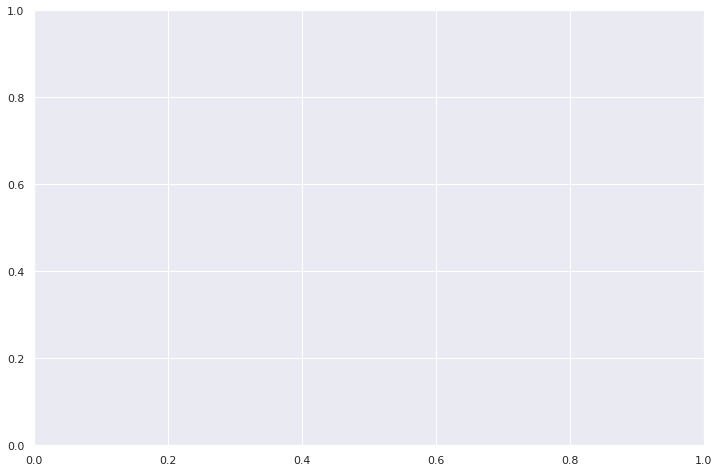

In [55]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 1')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 1
[[8800 1779 5503]
 [1751  384 1136]
 [5538 1237 3720]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55     16082
           1       0.11      0.12      0.12      3271
           2       0.36      0.35      0.36     10495

    accuracy                           0.43     29848
   macro avg       0.34      0.34      0.34     29848
weighted avg       0.43      0.43      0.43     29848



In [57]:
#accuracy
from sklearn.metrics import accuracy_score

In [58]:
knn1= accuracy_score(y_test,pred)

In [59]:
knn1

0.43232377378718845

In [ ]:
###conclusion

In [ ]:
#reference:
# https://github.com/zachzazueta/Diabetes_Readmittance_Predictions/blob/master/Zazueta%20-%20Mod%205%20Project.ipynb
# https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission


